In [25]:
import numpy as np
import calendar
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values
# df = df.dropna(subset='salary_year_avg')                ## Dropping NaN values
# df = df.dropna()
# df = df.explode('job_skills')

def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



In [3]:
df_us = df[(df['job_country']=='United States')].dropna(subset=['salary_year_avg']).copy()

In [4]:
## Saving top 6 job titles
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [5]:
df_top_6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [15]:
job_order = df_top_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

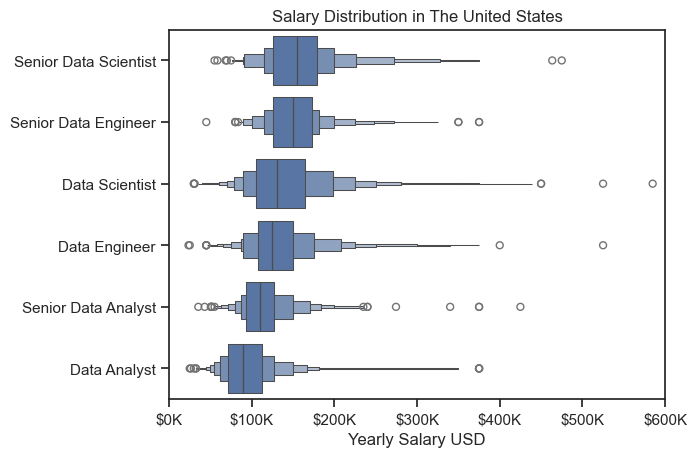

In [17]:
sns.boxenplot(data = df_top_6, x = 'salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
plt.title('Salary Distribution in The United States')
plt.xlim(0,600000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.ylabel('')
plt.xlabel('Yearly Salary USD')
plt.show()


### Top Paying skill and Top skill counts

In [51]:
df_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

In [52]:
df_us = df_us.dropna(subset=['salary_year_avg'])
df_us = df_us.explode('job_skills')
df_us[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [59]:
df_top_skill=df_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_top_skill= df_top_skill.head(10).sort_values(by='median', ascending=False)
# df_top_skill

In [60]:
df_top_pay=df_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_top_pay= df_top_pay.head(10)

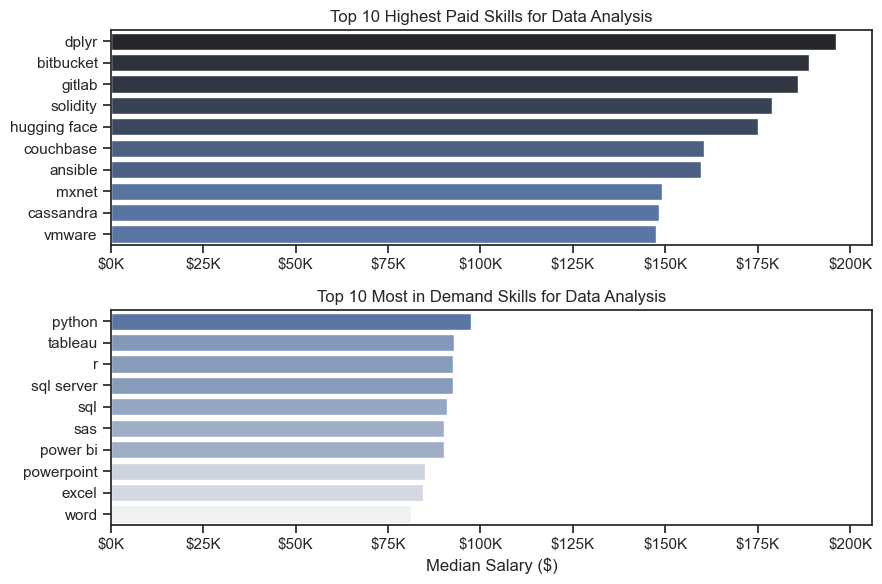

In [65]:

fig, ax = plt.subplots(2,1 , figsize=(9,6))


sns.set_theme(style='ticks')
sns.barplot(data=df_top_pay, x = 'median', y=df_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


sns.barplot(data=df_top_skill, x = 'median', y=df_top_skill.index, ax=ax[1], hue='median', palette='light:b')
# df_top_skill[::-1].plot(kind='barh',y='median',ax=ax[1])

ax[1].set_title('Top 10 Most in Demand Skills for Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($)')
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.tight_layout()

plt.show()
